In [1]:
''' 
STOCK MARKET PREDICTION AND ANALYSIS 

1. Stocks form Apple, Amazon, Google, and Microsoft are explored (closing prices, daily return, moving average). 
2. Correlation between stocks is observed. 
3. Risk of investing in a particular stock is measured.  
4. Time Series forecasting is done using ARIMA for Google Stocks.
5. Future stock prices are predicted through Long Short Term Memory (LSTM) method. 

'''

' \nSTOCK MARKET PREDICTION AND ANALYSIS \n\n1. Stocks form Apple, Amazon, Google, and Microsoft are explored (closing prices, daily return, moving average). \n2. Correlation between stocks is observed. \n3. Risk of investing in a particular stock is measured.  \n4. Time Series forecasting is done using ARIMA for Google Stocks.\n5. Future stock prices are predicted through Long Short Term Memory (LSTM) method. \n\n'

In [2]:
!pip install yfinance pandas_datareader


In [3]:
!pip install --upgrade yfinance


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# reading stock data from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


from datetime import datetime

stock_data = {}

# stocks used for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# End and Start times for data
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-11 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-14 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-15 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-16 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-17 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-18 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON   

Price                     Adj Close Close High  ...       Low Open Volume  \
Ticker                         GOOG  GOOG GOOG  ... MSFT MSFT MSFT   MSFT   
Date                                            ...                         
2024-10-11 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-14 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-15 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-16 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-17 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-18 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   

Price                       Adj Close       Close        High         Low  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Date                                                                        
2024-10-11 00:00:00+00:00  188.820007  188.820007  189.929993  186.300003   
2024-10-14 00:00:00+00:00  187.539993  187.539993  189.830002  187.360001   
2024-10-15 00:00:00+00:00  187.690002  187.690002  188.410004  184.580002   
2024-10-16 00:00:00+00:00  186.889999  186.889999  187.779999  185.610001   
2024-10-17 00:00:00+00:00  187.529999  187.529999  188.940002  186.000000   
2024-10-18 00:00:00+00:00  188.990005  188.990005  190.740005  186.279999   
2024-10-21 00:00:00+00:00  189.070007  189.070007  189.460007  186.399994   
2024-10-22 00:00:00+00:00  189.699997  189.699997  191.520004  186.979996   
2024-10-23 00:00:00+00:00  184.710007  184.710007  189.160004  183.690002   
2024-10-24 00:00:00+00:00  186.380005  186.380005  187.110001  183.865005   

Price                            Open      Volume  
Ticker                           AMZN        AMZN  
Date                                               
2024-10-11 00:00:00+00:00  186.630005  25751600.0  
2024-10-14 00:00:00+00:00  189.779999  22614400.0  
2024-10-15 00:00:00+00:00  187.630005  32178900.0  
2024-10-16 00:00:00+00:00  187.050003  23456800.0  
2024-10-17 00:00:00+00:00  188.220001  25039400.0  
2024-10-18 00:00:00+00:00  187.149994  37417700.0  
2024-10-21 00:00:00+00:00  188.050003  24639400.0  
2024-10-22 00:00:00+00:00  188.350006  29650600.0  
2024-10-23 00:00:00+00:00  188.850006  31937100.0  
2024-10-24 00:00:00+00:00  185.250000  21169629.0  

[10 rows x 25 columns]

In [19]:
df.head(10)

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-10-25 00:00:00+00:00  170.228928  171.100006  173.059998  170.649994   
2023-10-26 00:00:00+00:00  166.040359  166.889999  171.380005  165.669998   
2023-10-27 00:00:00+00:00  167.363586  168.220001  168.960007  166.830002   
2023-10-30 00:00:00+00:00  169.423035  170.289993  171.169998  168.869995   
2023-10-31 00:00:00+00:00  169.900620  170.770004  170.899994  167.899994   
2023-11-01 00:00:00+00:00  173.084320  173.970001  174.229996  170.119995   
2023-11-02 00:00:00+00:00  176.665985  177.570007  177.779999  175.460007   
2023-11-03 00:00:00+00:00  175.750671  176.649994  176.820007  173.350006   
2023-11-06 00:00:00+00:00  178.317520  179.229996  179.429993  176.210007   
2023-11-07 00:00:00+00:00  180.894348  181.820007  182.440002  178.970001   

Price                            Open      Volume company_name Adj Close  \
Ticker                           AAPL        AAPL                   GOOG   
Date                                                                       
2023-10-25 00:00:00+00:00  171.880005  57157000.0        APPLE       NaN   
2023-10-26 00:00:00+00:00  170.369995  70625300.0        APPLE       NaN   
2023-10-27 00:00:00+00:00  166.910004  58499100.0        APPLE       NaN   
2023-10-30 00:00:00+00:00  169.020004  51131000.0        APPLE       NaN   
2023-10-31 00:00:00+00:00  169.350006  44846000.0        APPLE       NaN   
2023-11-01 00:00:00+00:00  171.000000  56934900.0        APPLE       NaN   
2023-11-02 00:00:00+00:00  175.520004  77334800.0        APPLE       NaN   
2023-11-03 00:00:00+00:00  174.240005  79763700.0        APPLE       NaN   
2023-11-06 00:00:00+00:00  176.380005  63841300.0        APPLE       NaN   
2023-11-07 00:00:00+00:00  179.179993  70530000.0        APPLE       NaN   

Price                     Close High  ...       Low Open Volume Adj Close  \
Ticker                     GOOG GOOG  ... MSFT MSFT MSFT   MSFT      AMZN   
Date                                  ...                                   
2023-10-25 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-10-26 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-10-27 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-10-30 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-10-31 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-01 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-02 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-03 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-06 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-07 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   

Price                     Close High  Low Open Volume  
Ticker                     AMZN AMZN AMZN AMZN   AMZN  
Date                                                   
2023-10-25 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-10-26 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-10-27 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-10-30 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-10-31 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-01 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-02 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-03 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-06 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-07 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  

[10 rows x 25 columns]

In [20]:
# check if data is downloaded correctly
for ticker in tech_list:
    print(f"{ticker} data:\n", stock_data[ticker].head(), "\n")

AAPL data:
 Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-10-25 00:00:00+00:00  170.228928  171.100006  173.059998  170.649994   
2023-10-26 00:00:00+00:00  166.040344  166.889999  171.380005  165.669998   
2023-10-27 00:00:00+00:00  167.363571  168.220001  168.960007  166.830002   
2023-10-30 00:00:00+00:00  169.423035  170.289993  171.169998  168.869995   
2023-10-31 00:00:00+00:00  169.900604  170.770004  170.899994  167.899994   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2023-10-25 00:00:00+00:00  171.880005  57157000  
2023-10-26 00:00:00+00:00  170.369995  70625300  
2023-10-27 00:00:00+00:00  166.910004  58499100  
2023-10-30 00:00:00+00:00  169.020004  51131000  
2023-10-31 00:00:00+0

In [21]:
# Check if 'Adj Close' exists
for ticker in tech_list:
    print(f"{ticker} columns:\n", stock_data[ticker].columns, "\n")

AAPL columns:
 MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker']) 

GOOG columns:
 MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker']) 

MSFT columns:
 MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker']) 

AMZN columns:
 MultiIndex([('Adj Close', 'AMZN'),
            (    'Close', 'AMZN'),
            (     'High', 'AMZN'),
            (      'Low', 'AMZN'),
            (     'Open', 'AMZN'),
            

<Figure size 1000x1000 with 0 Axes>

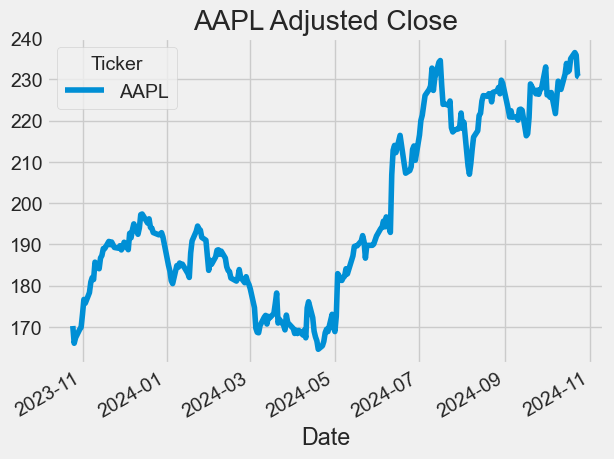

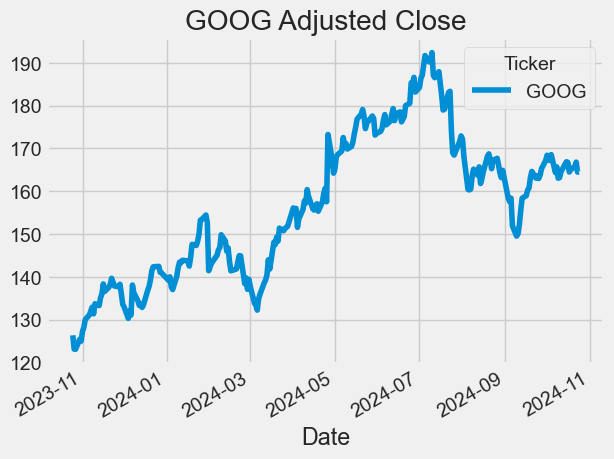

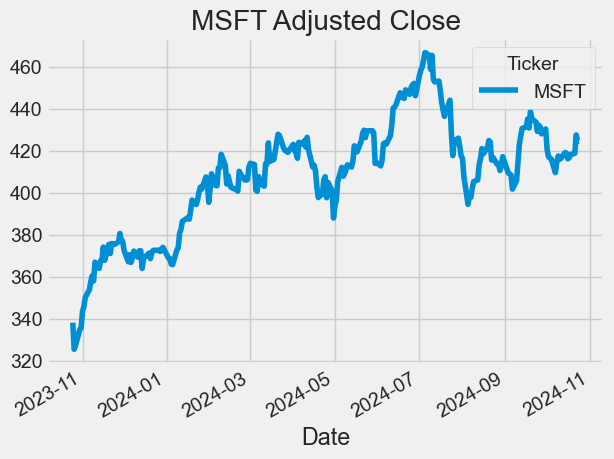

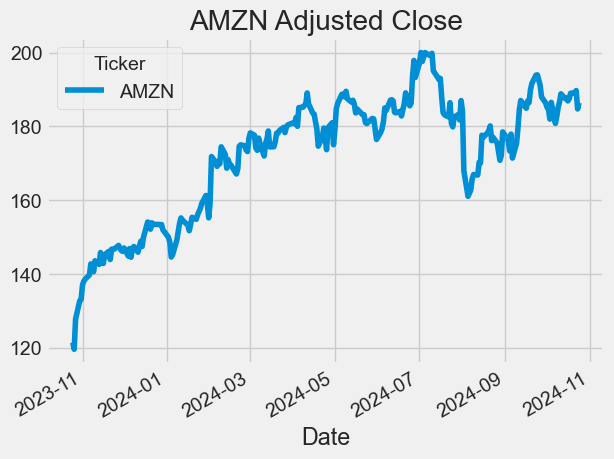

In [22]:
#Closing Price
plt.figure(figsize=(10, 10))

stock_data['AAPL']['Adj Close'].plot()
plt.title("AAPL Adjusted Close")
plt.show()

stock_data['GOOG']['Adj Close'].plot()
plt.title("GOOG Adjusted Close")
plt.show()

stock_data['MSFT']['Adj Close'].plot()
plt.title("MSFT Adjusted Close")
plt.show()

stock_data['AMZN']['Adj Close'].plot()
plt.title("AMZN Adjusted Close")
plt.show()



In [23]:
closing_df = pd.DataFrame()

# DataFrame of 'Adj Close' prices for each stock
for stock in tech_list:
    closing_df[stock] = stock_data[stock]['Adj Close']

# New returns DataFrame (percentage change)
tech_rets = closing_df.pct_change()

tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-10-25 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-26 00:00:00+00:00,-0.024606,-0.025499,-0.037514,-0.014993
2023-10-27 00:00:00+00:00,0.007969,-0.000324,0.005856,0.068328
2023-10-30 00:00:00+00:00,0.012305,0.019044,0.022740,0.038907
2023-10-31 00:00:00+00:00,0.002819,-0.003579,0.002372,0.002863


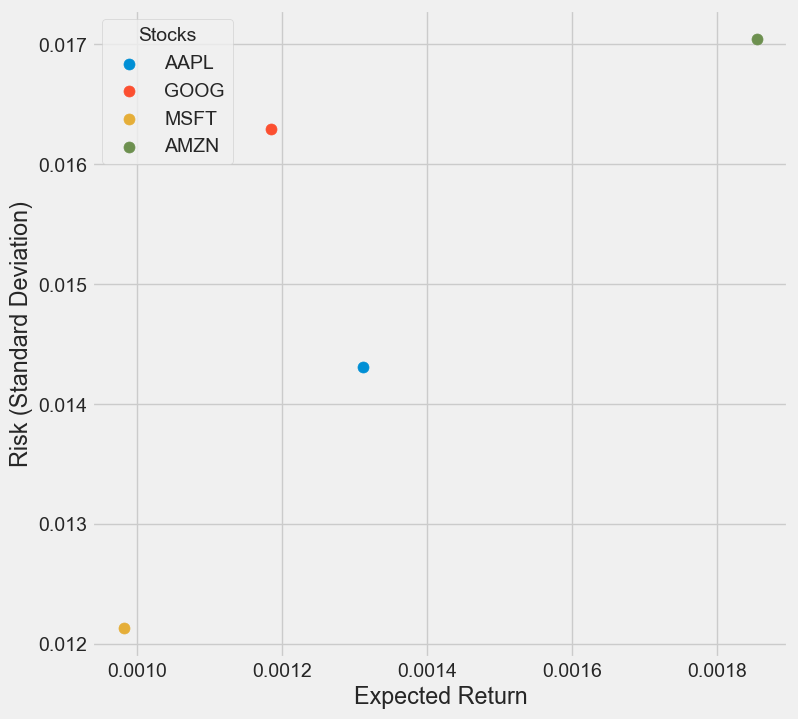

In [24]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 8))

for label in rets.columns:
    plt.scatter(rets[label].mean(), rets[label].std(), s=area, label=label)

plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

plt.legend(title='Stocks')

plt.show()

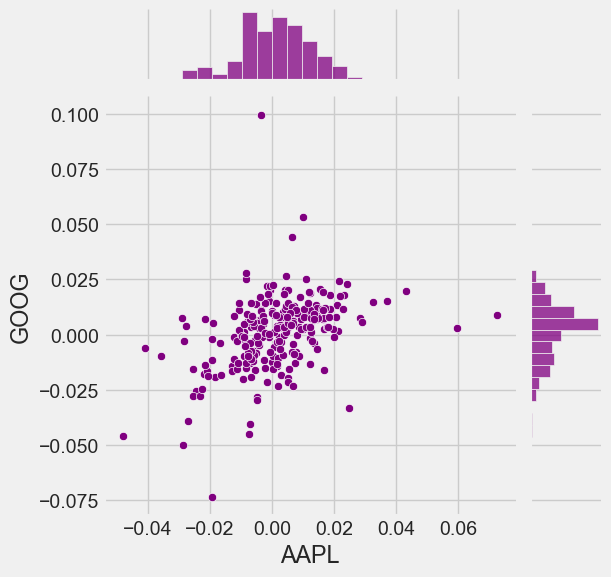

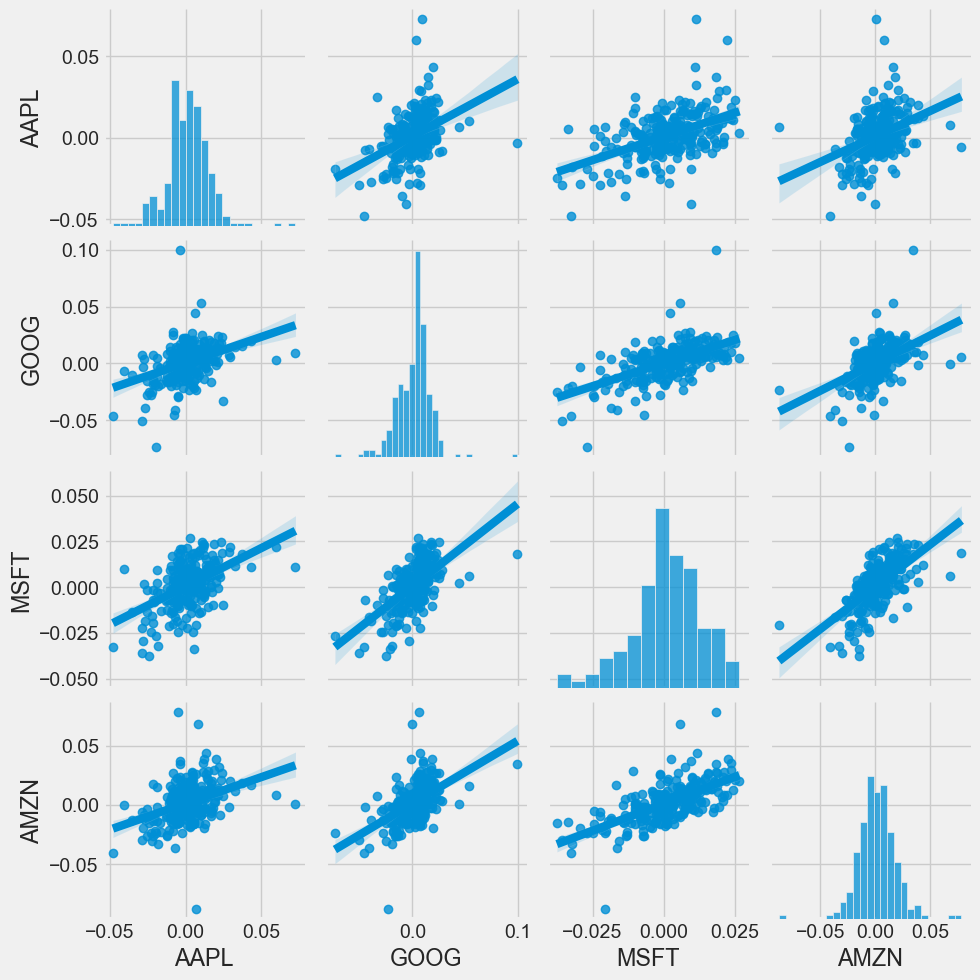

In [25]:
# compare the daily percentage return of two stocks to check correlation
sns.jointplot(x='AAPL', y='GOOG', data=tech_rets, kind='scatter', color='purple')

# Comparison Analysis for all combinations
sns.pairplot(tech_rets, kind='reg')

C:\Users\shubh\AppData\Local\Temp\ipykernel_8108\3274364906.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

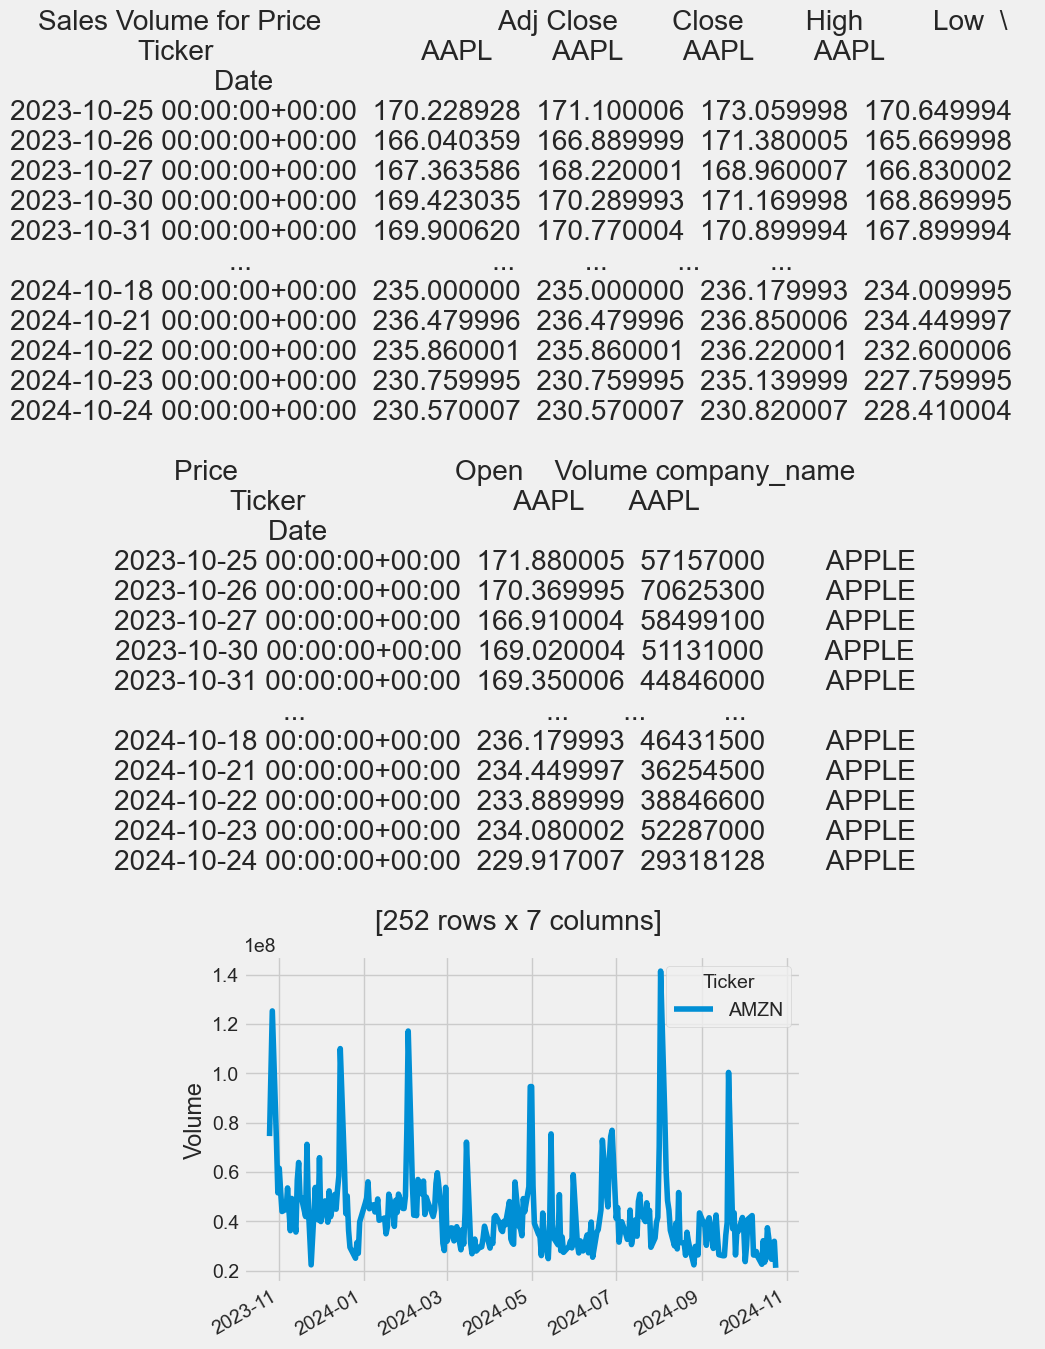

In [26]:
#Volume of Sales
plt.figure(figsize=(10, 10))

company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for {AAPL} ")
    
plt.tight_layout()

Text(0.5, 1.0, 'AMAZON')

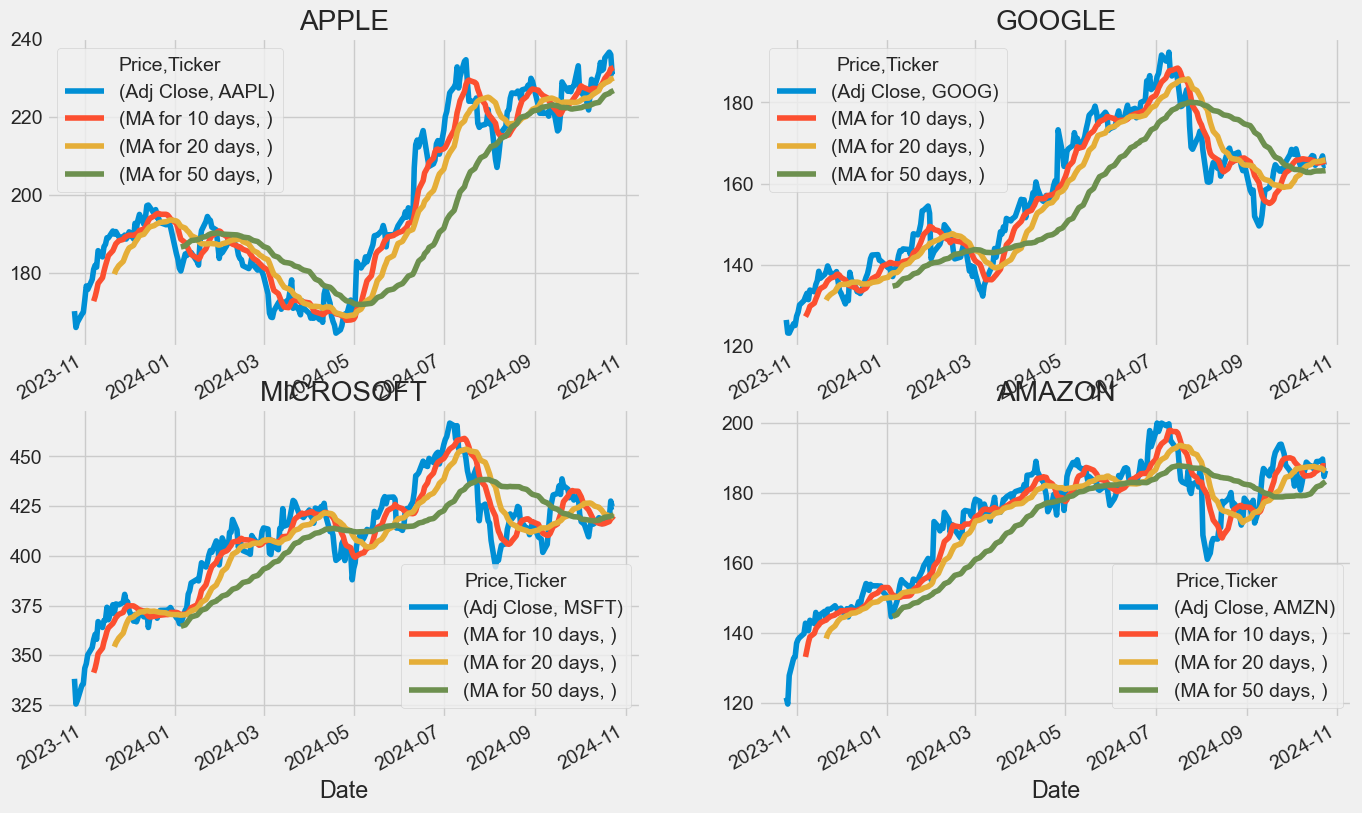

In [27]:
#MOving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

Text(0.5, 1.0, 'AMAZON')

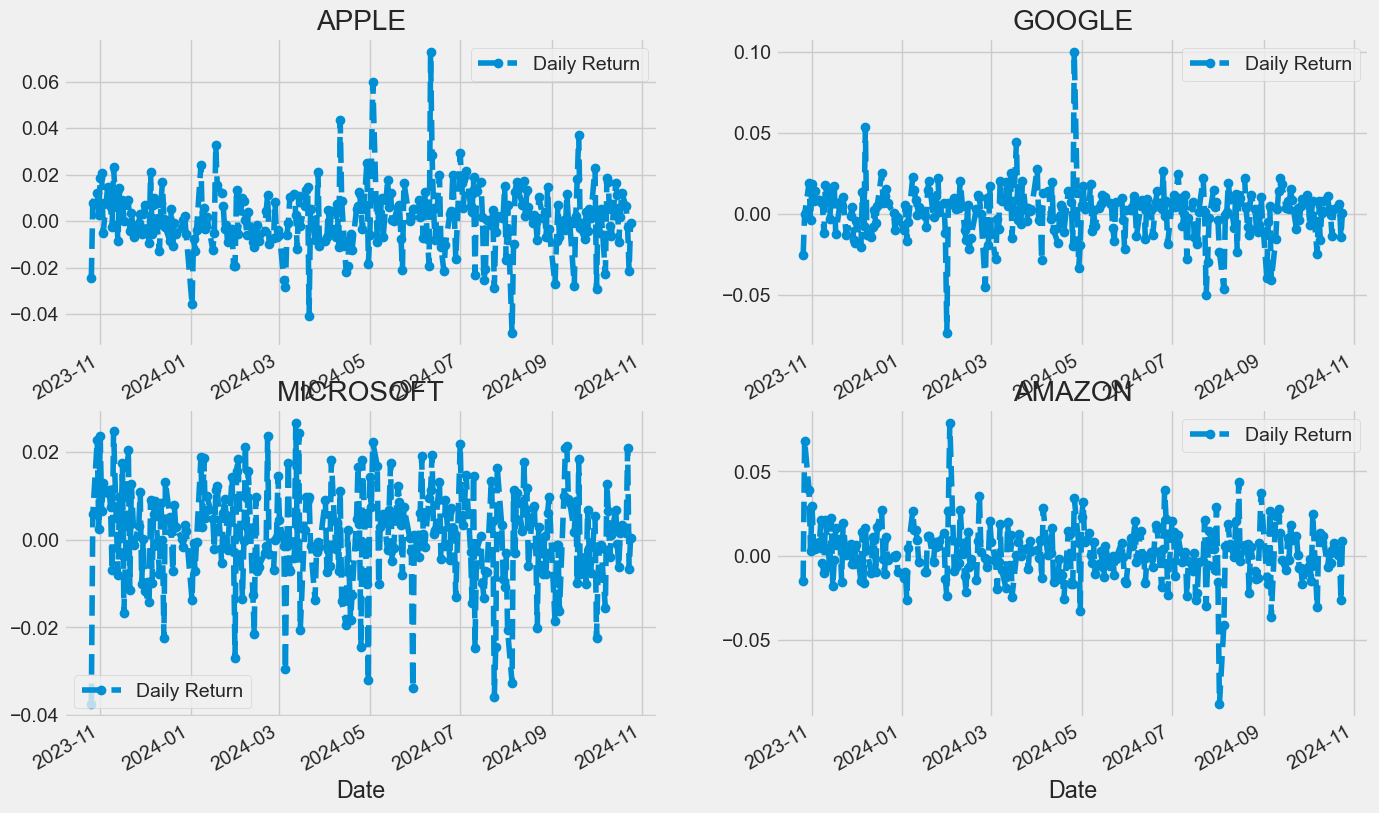

In [28]:
#daily return for stocks
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plotting daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

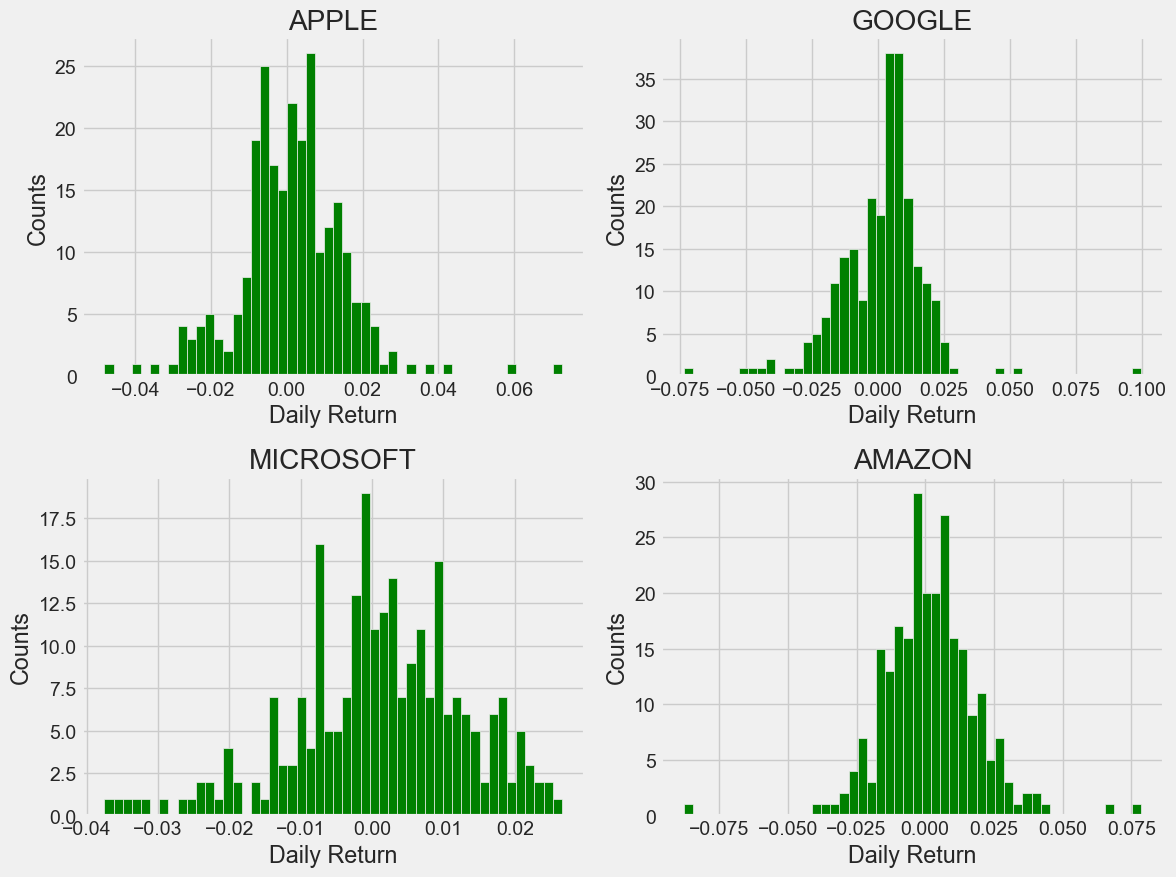

In [29]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color='green')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Text(0.5, 1.0, 'Correlation of stock closing price')

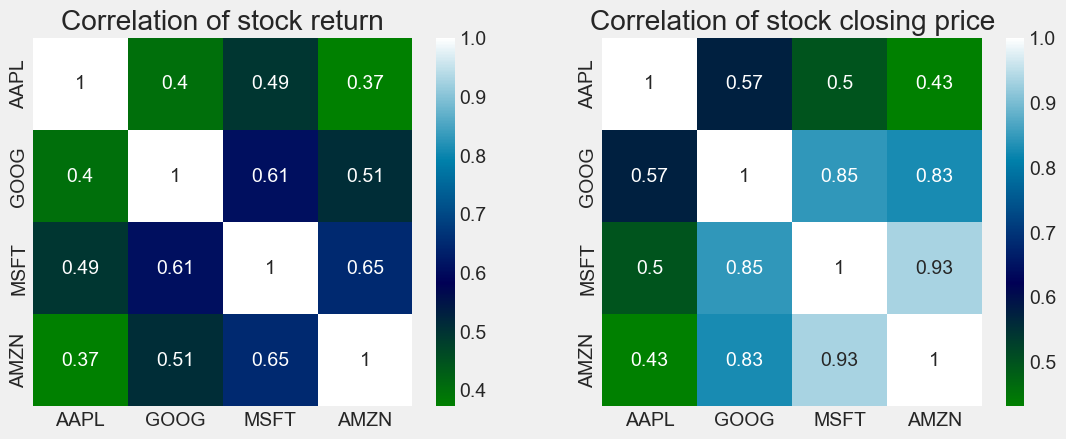

In [30]:
plt.figure(figsize=(12, 10))

#correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock return')

#correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock closing price')

In [31]:
# TIME SERIES FORECASTING USING ARIMA FOR GOOGLE STOCK PRICES

In [32]:
import datetime
from datetime import date, timedelta
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

Price                       Date        Open        High         Low  \
Ticker                                  GOOG        GOOG        GOOG   
246    2024-10-18 00:00:00+00:00  164.869995  166.369995  164.750000   
247    2024-10-21 00:00:00+00:00  164.580002  166.220001  164.304993   
248    2024-10-22 00:00:00+00:00  164.699997  167.470001  164.669998   
249    2024-10-23 00:00:00+00:00  166.429993  167.600006  163.632996   
250    2024-10-24 00:00:00+00:00  164.589996  165.050003  162.770004   

Price        Close   Adj Close    Volume  
Ticker        GOOG        GOOG      GOOG  
246     165.050003  165.050003  13091300  
247     165.800003  165.800003  11384000  
248     166.820007  166.820007  11958600  
249     164.479996  164.479996  12754300  
250     164.529999  164.529999  12520560  


In [33]:
data = data[["Date", "Close"]]
print(data.head())

Price                       Date       Close
Ticker                                  GOOG
0      2023-10-26 00:00:00+00:00  123.440002
1      2023-10-27 00:00:00+00:00  123.400002
2      2023-10-30 00:00:00+00:00  125.750000
3      2023-10-31 00:00:00+00:00  125.300003
4      2023-11-01 00:00:00+00:00  127.570000


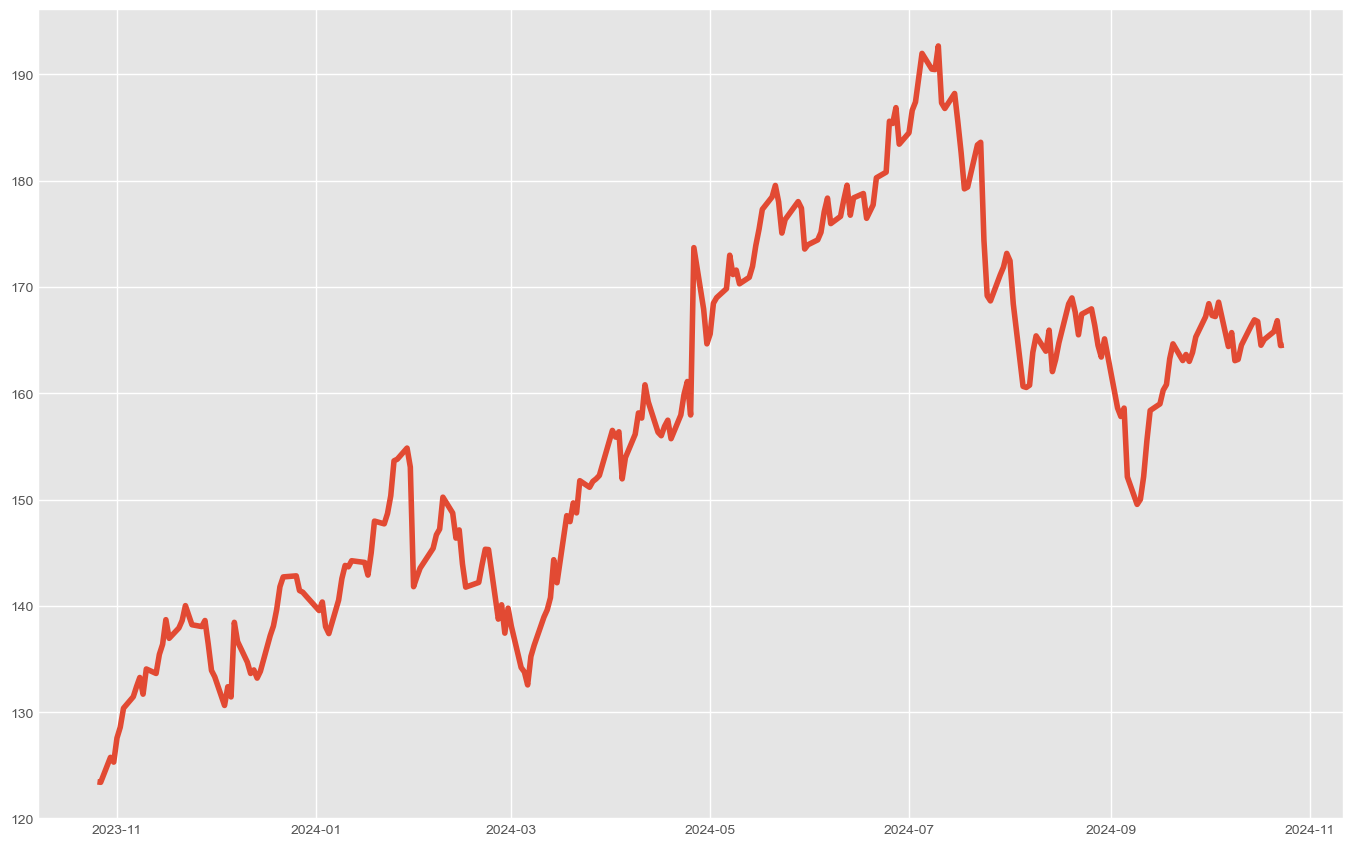

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

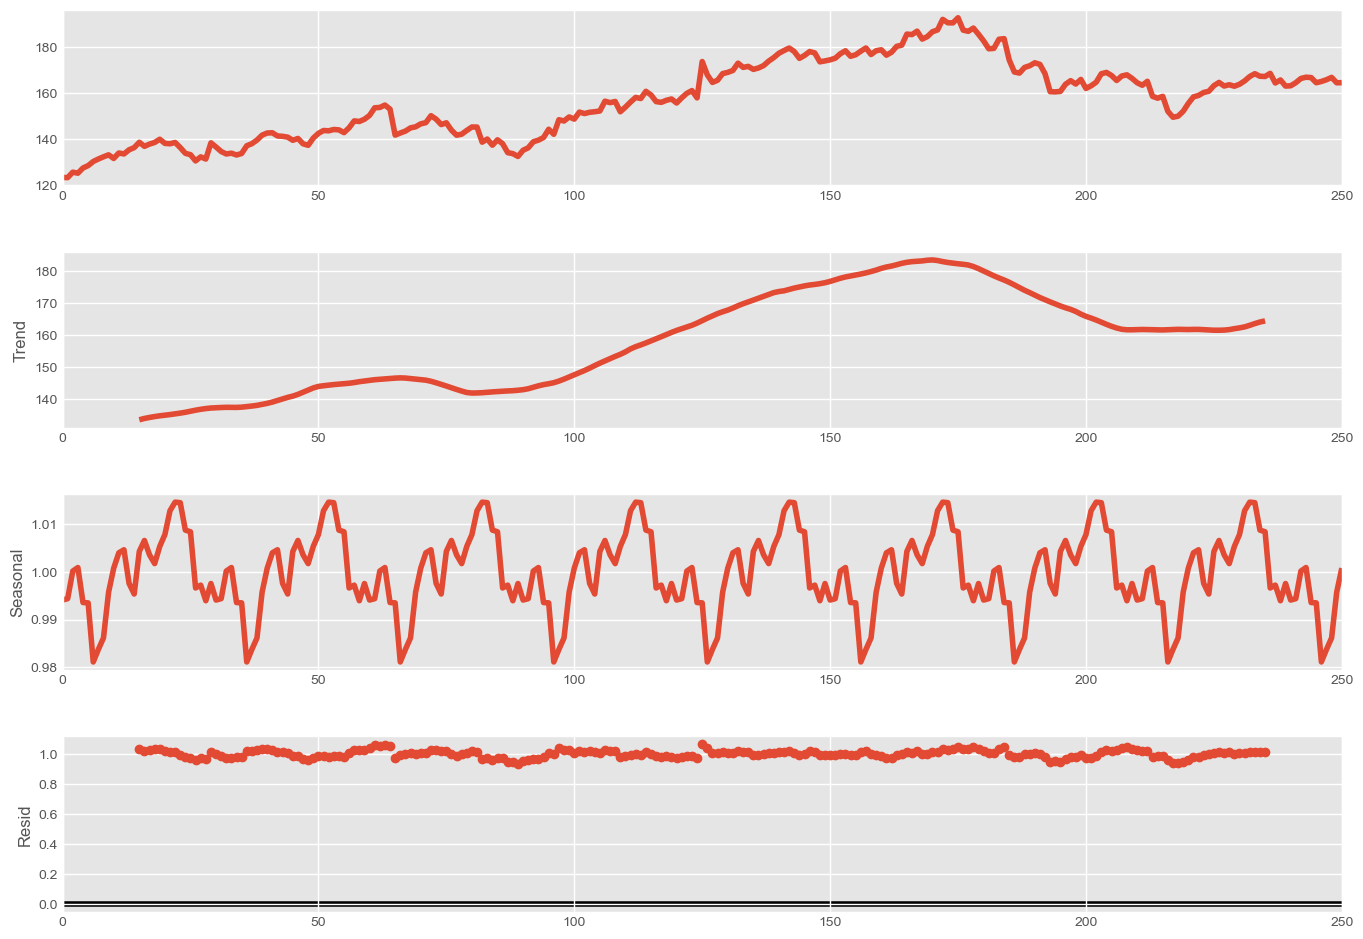

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

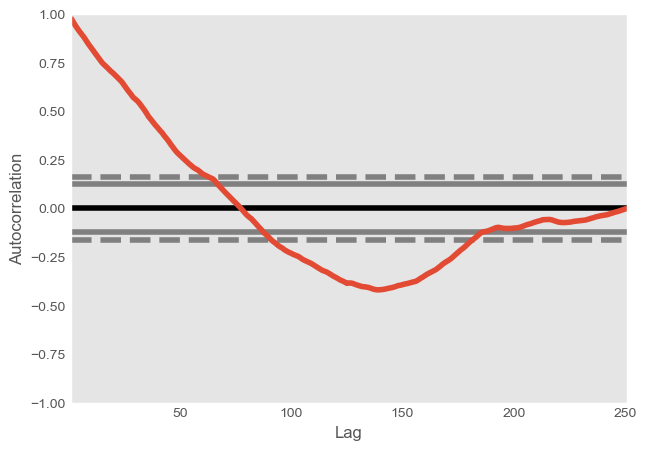

In [36]:
pd.plotting.autocorrelation_plot(data["Close"])


In [37]:
# curve is moving down after the 10th line of the first boundary, therefore p = 10

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


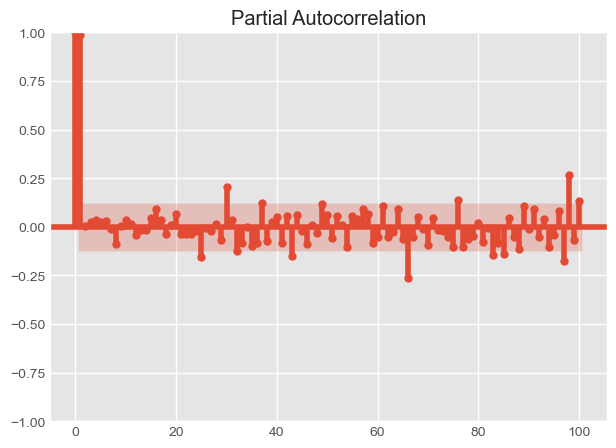

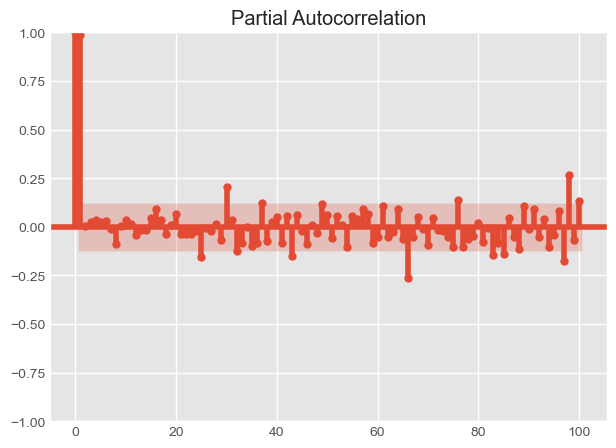

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [39]:
# 2 points are far away from others, therefore q=2
# since data is seasonal , d = 1

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
p, d, q = 10, 1, 2

# Import the ARIMA class from the correct module
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

# Print the summary of the fitted model
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  251
Model:                ARIMA(10, 1, 2)   Log Likelihood                -585.204
Date:                Fri, 25 Oct 2024   AIC                           1196.408
Time:                        02:32:57   BIC                           1242.187
Sample:                             0   HQIC                          1214.833
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0156      0.848     -1.198      0.231      -2.677       0.646
ar.L2         -0.2448      0.808     -0.303      0.762      -1.829       1.339
ar.L3         -0.0667      0.108     -0.615      0.5

In [41]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      123.439985
2      123.400844
3      125.699909
4      125.286550
          ...    
246    164.277639
247    165.289837
248    165.852366
249    167.469590
250    164.165160
Name: predicted_mean, Length: 251, dtype: float64


In [42]:
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 GOOG   No. Observations:                  251
Model:             SARIMAX(10, 1, 2)x(10, 1, 2, 12)   Log Likelihood                -568.748
Date:                              Fri, 25 Oct 2024   AIC                           1187.496
Time:                                      02:37:27   BIC                           1274.303
Sample:                                           0   HQIC                          1222.481
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8353      1.219     -0.685      0.493      -3.225       1.554
ar.L2         -0.03

In [43]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

251    163.000866
252    162.069998
253    161.178501
254    160.948567
255    162.615265
256    161.752320
257    162.005448
258    159.476272
259    160.328498
260    160.981768
261    161.251480
262    160.400435
263    159.210630
264    157.369783
265    156.223960
266    156.477306
267    156.128058
268    157.100610
269    155.588414
270    154.910691
271    156.675278
Name: predicted_mean, dtype: float64


<Axes: >

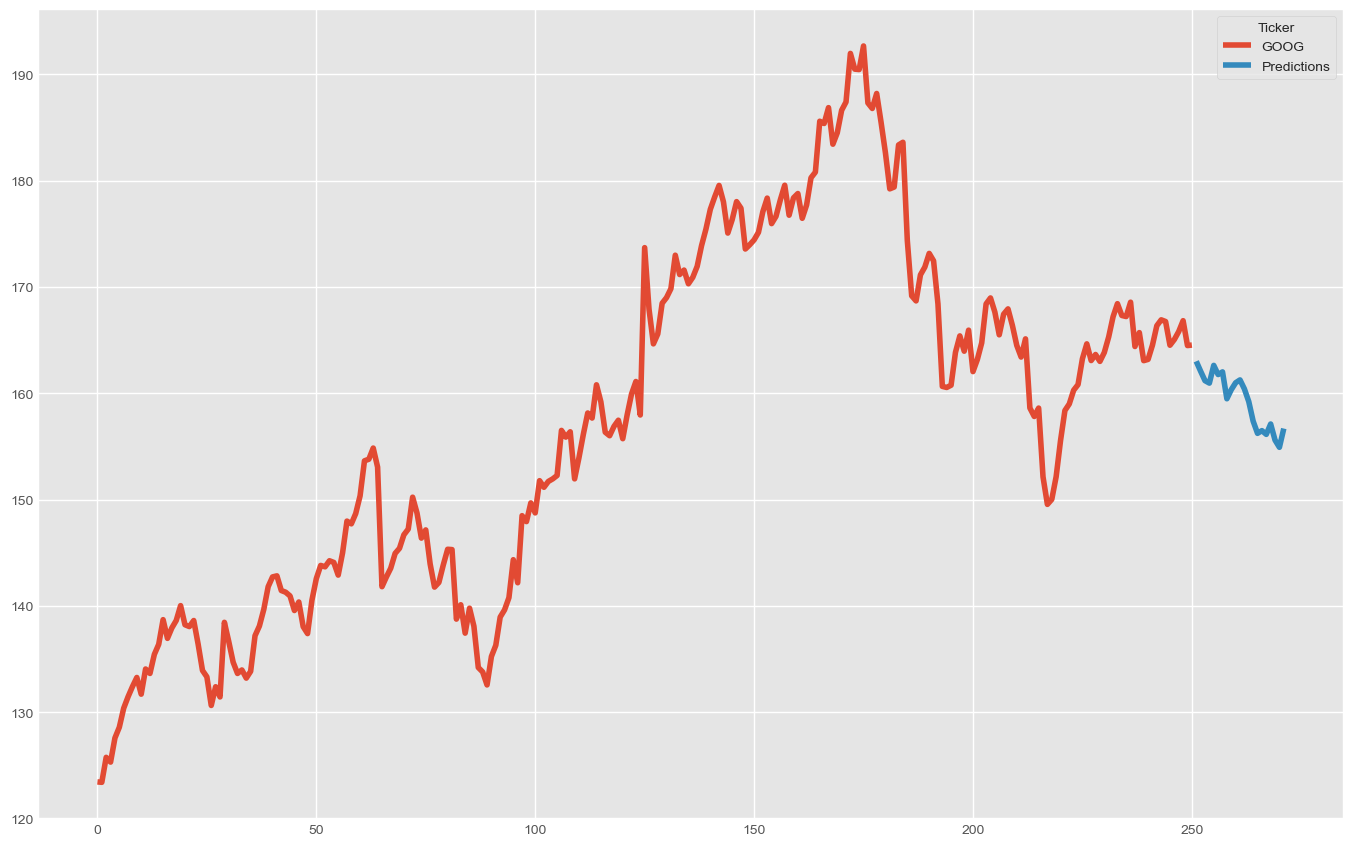

In [44]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [45]:
# PREDICTING CLOSING STOCK PRICE FOR AMZN USING LSTM

In [46]:
df = yf.download('AMZN', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

Price                       Date        Open        High         Low  \
Ticker                                  AMZN        AMZN        AMZN   
246    2024-10-18 00:00:00+00:00  187.149994  190.740005  186.279999   
247    2024-10-21 00:00:00+00:00  188.050003  189.460007  186.399994   
248    2024-10-22 00:00:00+00:00  188.350006  191.520004  186.979996   
249    2024-10-23 00:00:00+00:00  188.850006  189.160004  183.690002   
250    2024-10-24 00:00:00+00:00  185.250000  187.110001  183.865005   

Price        Close   Adj Close    Volume  
Ticker        AMZN        AMZN      AMZN  
246     188.990005  188.990005  37417700  
247     189.070007  189.070007  24639400  
248     189.699997  189.699997  29650600  
249     184.710007  184.710007  31937100  
250     186.380005  186.380005  21539596  


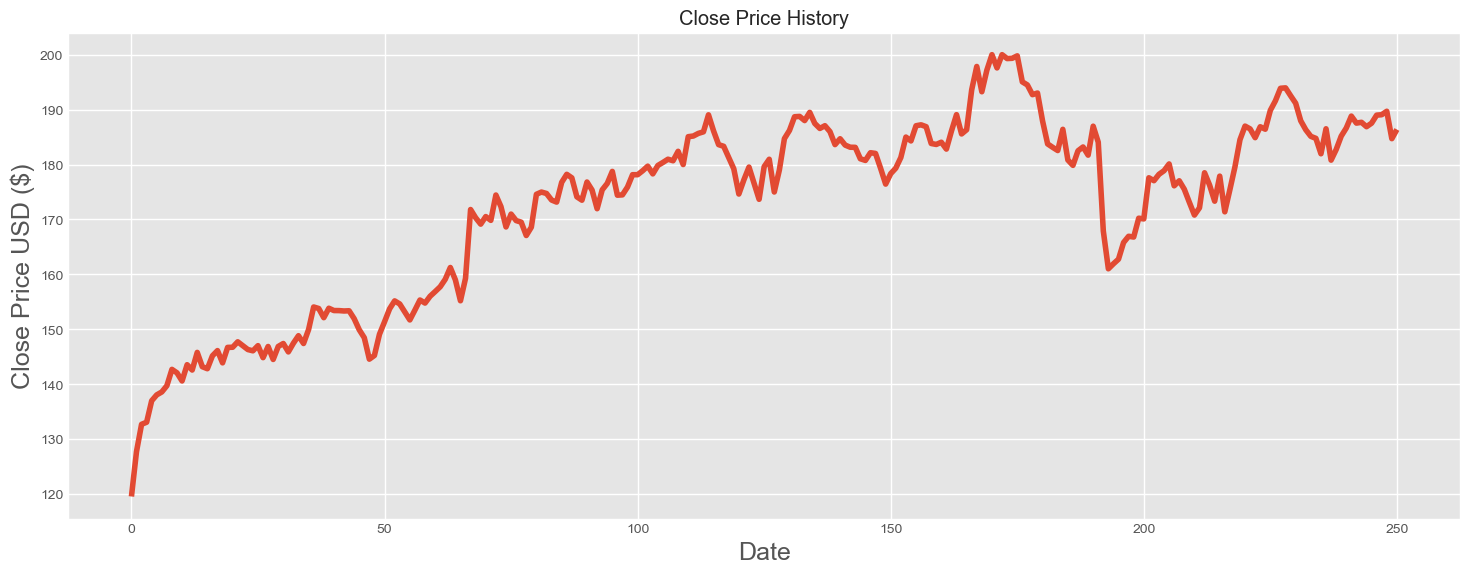

In [47]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [48]:
df = df["Close"]
print(df.head())

Ticker        AMZN
0       119.570000
1       127.739998
2       132.710007
3       133.089996
4       137.000000


In [49]:
dataset = df.values
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.10157899],
       [0.16337196],
       [0.16809644],
       [0.21671019],
       [0.23001377],
       [0.23660334],
       [0.25077714],
       [0.28770368],
       [0.27987072],
       [0.26146968],
       [0.29827176],
       [0.28621157],
       [0.32612213],
       [0.29379581],
       [0.2891956 ],
       [0.31841344],
       [0.3302251 ],
       [0.30249899],
       [0.33743637],
       [0.33780935],
       [0.35011806],
       [0.34141488],
       [0.33258744],
       [0.32972767],
       [0.34141488],
       [0.31418621],
       [0.33954998],
       [0.31020769],
       [0.33954998],
       [0.34626381],
       [0.32724107],
       [0.34700977],
       [0.36391889],
       [0.34626381],
       [0.37796844],
       [0.42894452],
       [0.42546305],
       [0.40469968],
       [0.42608475],
       [0.42086284],
       [0.42073858],
       [0.41986817],
       [0.4203656 ],
       [0.4024618 ],
       [0.377471  ],
       [0.35931868],
       [0.310

In [51]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.10157899, 0.16337196, 0.16809644, 0.21671019,
       0.23001377, 0.23660334, 0.25077714, 0.28770368, 0.27987072,
       0.26146968, 0.29827176, 0.28621157, 0.32612213, 0.29379581,
       0.2891956 , 0.31841344, 0.3302251 , 0.30249899, 0.33743637,
       0.33780935, 0.35011806, 0.34141488, 0.33258744, 0.32972767,
       0.34141488, 0.31418621, 0.33954998, 0.31020769, 0.33954998,
       0.34626381, 0.32724107, 0.34700977, 0.36391889, 0.34626381,
       0.37796844, 0.42894452, 0.42546305, 0.40469968, 0.42608475,
       0.42086284, 0.42073858, 0.41986817, 0.4203656 , 0.4024618 ,
       0.377471  , 0.35931868, 0.31082939, 0.31915959, 0.36715164,
       0.3953748 , 0.42471709, 0.44274516, 0.43578261, 0.41763029,
       0.39960222, 0.42185752, 0.44473451, 0.43777196, 0.45318916])]
[0.4637572458141963]

[array([0.        , 0.10157899, 0.16337196, 0.16809644, 0.21671019,
       0.23001377, 0.23660334, 0.25077714, 0.28770368, 0.27987072,
       0.26146968, 0.29827176, 0.286

In [52]:
!pip install tensorflow

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0235


In [54]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


8.026100003766631

In [55]:
train = df.iloc[:training_data_len]
valid = df.iloc[training_data_len:]
valid['Predictions'] = predictions
valid


C:\Users\shubh\AppData\Local\Temp\ipykernel_8108\84718757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Ticker,AMZN,Predictions
239,185.169998,179.051758
240,186.649994,178.768890
241,188.820007,178.715683
242,187.539993,178.916199
243,187.690002,179.160797
244,186.889999,179.420303
245,187.529999,179.617630
246,188.990005,179.801041
247,189.070007,180.041382
248,189.699997,180.292160


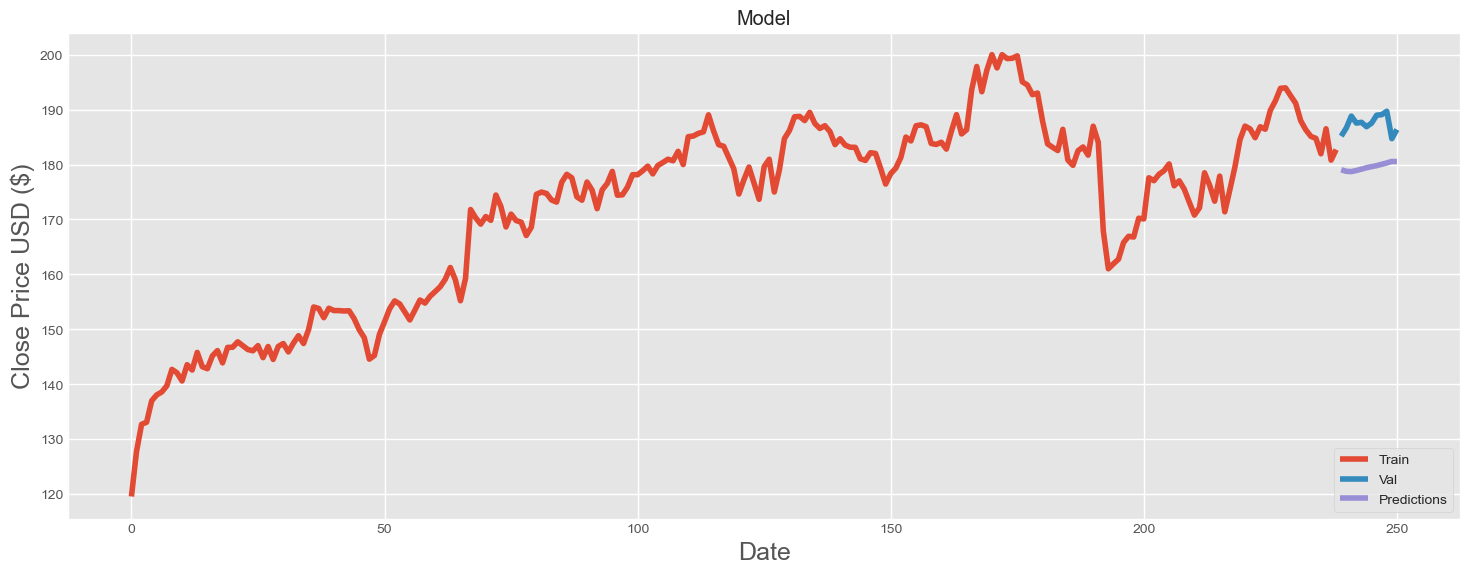

In [56]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AMZN'])
plt.plot(valid[['AMZN', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [58]:
'''
Thank You
'''

'\nThank You\n'